In [11]:
#On importe les bibliothèques utiles
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

# Petite instance

In [12]:
#Tableau des distances de la petite instance. La distance à parcourir pour aller de la machine i àa la machine j est D1[i][j]
D1 = [
[0, 9, 4, 9, 9, 4, 15, 4, 11, 9, 12],
[7, 0, 6, 11, 14, 5, 9, 12, 7, 7, 8],
[4, 13, 0, 9, 9, 14, 15, 12, 5, 14, 8],
[7, 5, 8, 0, 4, 15, 12, 5, 5, 7, 8],
[11, 8, 7, 13, 0, 11, 10, 11, 6, 5, 6],
[13, 4, 6, 15, 10, 0, 4, 10, 9, 7, 8],
[9, 4, 10, 15, 5, 13, 0, 14, 7, 15, 8],
[11, 7, 7, 10, 13, 15, 10, 0, 12, 11, 4],
[9, 6, 10, 10, 11, 10, 7, 7, 0, 5, 14],
[10, 10, 11, 9, 7, 9, 5, 7, 8, 0, 10],
[10, 9, 9, 15, 8, 6, 7, 9, 10, 10, 0]
]

# Ordres de fabrication de la petite instance
OF1 =[ [2,   1,   4,   7,   6,   3,   5,   8],
           [4,   6,   8,   2,   3,   1,   7,   5],
           [8,   5,   6,   4,   7,   3,   1],
           [4,   7,   3,   5,   2,   1,   6,8],
           [3,   2,   6,   7,   4],
           [1,   3,   2,   5,   4,   7,   6],
           [5,   6,   7,   3,   4,   1]]

# Volumes de vente. Le volume de vente du produit i est est V1[i]
V1 = [4982, 2185, 2209, 2083, 4286, 4654, 3925]


In [13]:
#Fonction coût
#Une solution est représentée par une permutation de L = [1,2,...,9] (la machine 9 est la machine vide). La machine L[i] est à l'emplacement i+1.
def cout(s):
    somme = 0
    for i in range(0,len(V1)):
        trajet = D1[0][s.index(OF1[i][0])+1] + D1[s.index(OF1[i][-1])+1][-1]
        for j in range(0,len(OF1[i])-1):
            trajet += D1[s.index(OF1[i][j])+1][s.index(OF1[i][j+1])+1]
        somme += trajet*V1[i]
    return somme
#Complexité en O(p*m²) avec p le nombre de produits et m le nombre de machines


#Fonction qui échange au hasard la position de deux éléments d'une liste
def echange(l): 
    n = len(l)
    i = random.randint(0,n-1)
    j = i
    while j == i:
        j = random.randint(0,n-1)
    l[i],l[j] = l[j],l[i]
    return l
#Complexité en O(1)



In [14]:
#On initialise l'algo de recuit avec une solution initiale, une température initiale un facteur de décroissance alpha et un nombre max d'itérations
def recuit(s0,t0,n,alpha): 
    cout_min = +inf
    j = 0
    sm = s0
    while j < n :
        j += 1
        s = s0.copy()
        s = echange(s)
        if cout(s) < cout(s0):
            s0 = s
            if cout(s0) < cout_min :
                sm = s0 ; cout_min = cout(s0)
        else :
            deltaf = cout(s) - cout(s0)
            u = random.random()
            if u <= exp(-deltaf/t0):
                s0 = s
        t0 = t0*alpha
    return [cout_min, sm]
#Complexité en O(p*m²*n) avec n le nombre d'itérations

In [15]:
#Exemple avec T0 = 150k, n = 1000, alpha = 0.95 et s0 = [1,2,3,4,5,6,7,8,9]

recuit([1,2,3,4,5,6,7,8,9],150000,1000,0.95)

[1456089, [7, 1, 3, 2, 4, 9, 8, 6, 5]]

In [34]:
#On fait la moyenne sur m instances des coûts des solutions
#Le pourcentage de réussite correspond au nombre de fois où l'algorithme trouve la solution optimale (de coût 1335193)
def plot_recuit(s0,t0,n,alpha,m):
    t1 = time.process_time()
    L = []
    reussite = 0
    moyenne = 0
    for k in range(0,m):
        L.append(recuit(s0,t0,n,alpha)[0])
        moyenne += L[k]
        if L[k] == 1335193:
            reussite += 1;
    t2 = time.process_time()
    pourcentage_de_reussite = (reussite/m)*100 
    print(f'Le temps d_éxécution est de {t2-t1}s.')
    print(f'Le pourcentage de réussite est de {pourcentage_de_reussite} pourcent.')
    moyenne = moyenne/m
    print(f'Le coût moyen sur {m} instances est de {moyenne}, ce qui correspond à une diminution moyenne du coût de {(1-moyenne/cout(s0))*100} pourcent.')
    fig, ax = plt.subplots()
    ax.plot(L)
    plt.axhline(y=moyenne,color='red')
    plt.show()
#Complexité en O(p*m²*n*M) (avec M le nombre d'instances choisies)

Le temps d_éxécution est de 55.578125s
Le pourcentage de réussite est de 10.8 pourcent.
Le coût moyen sur 500 instances est de 1405352.94, ce qui correspond à une diminution moyenne du coût de 26.254399879937683 pourcent.


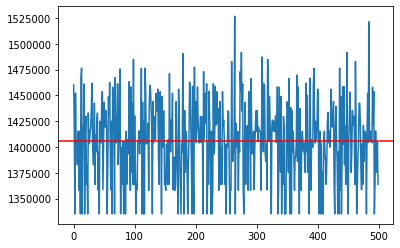

In [35]:
#Moyenne des coûts sur 500 instances
#Le temps d'éxécution est d'environ une minute
plot_recuit([1,2,3,4,5,6,7,8,9],150000,1000,0.95,500)

# Grande Instance

La taille des données est importante. On ne peut donc pas les extraire à la main. On a écrit un petit programme qui les extrait directement du fichier Excel.

In [22]:
#On récupère les distances entre les emplacements
D2 = []
with open("./Distance.csv") as Distance_file:

    read = csv.reader(Distance_file, delimiter = ";")

    for line in read :
        D2.append(list(map(int, line)))
        
#On récupère les volumes de vente
V2=[]
with open("./V.csv") as V_file:

    readV = csv.reader(V_file, delimiter = ";")
    count = 0
    for line in readV :

        if count != 0:

            V2.append(int(line[0]))

        count += 1
        
#On récupère les ordres de fabrication
OF2=[]
with open("./OF.csv") as OF_file:

    of_read = csv.reader(OF_file, delimiter = ";")
    count_line = 0
    for line in of_read :
        if count_line != 0:
            ligne = []
            for m in line:
                if m == '':
                    ligne.append('0')
                else :
                    ligne.append(m)
            OF2.append(list(map(int, ligne[1:])))
        count_line += 1
        
def bon_ordre(L):
    l = []
    for produit in L:
        p = []
        m = max(produit)
        for k in range(1,m+1):
            p.append(produit.index(k)+1)
        l.append(p)
    return l

OF2 = bon_ordre(OF2)

In [23]:
#La fonction cout pour la grande instance
def cout2(s):
    somme = 0
    for i in range(0,len(V2)):
        trajet = D2[0][s.index(OF2[i][0])+1] + D2[s.index(OF2[i][-1])+1][-1]
        for j in range(0,len(OF2[i])-1):
            trajet += D2[s.index(OF2[i][j])+1][s.index(OF2[i][j+1])+1]
        somme += trajet*V2[i]
    return somme

In [24]:
def recuit2(s0,t0,n,alpha): 
    cout_min = +inf
    j = 0
    sm = s0
    while j < n :
        j += 1
        s = s0.copy()
        s = echange(s)
        if cout2(s) < cout2(s0):
            s0 = s
            if cout2(s0) < cout_min :
                sm = s0 ; cout_min = cout2(s0)
        else :
            deltaf = cout2(s) - cout2(s0)
            u = random.random()
            if u <= exp(-deltaf/t0):
                s0 = s
        t0 = t0*alpha
    return [cout_min, sm]

In [36]:
def plot_recuit2(s0,t0,n,alpha,m):
    t1 = time.process_time()
    L = []
    moyenne = 0
    for k in range(0,m):
        L.append(recuit2(s0,t0,n,alpha)[0])
        moyenne += L[k]
        if L[k] == 1335193:
            reussite += 1;
    t2 = time.process_time()
    print(f'Le temps d_éxécution est de {t2-t1}s.')
    moyenne = moyenne/m
    print(f'Le coût moyen sur {m} instances est de {moyenne}, ce qui correspond à une diminution moyenne du coût de {(1-moyenne/cout2(s0))*100} pourcent.')
    fig, ax = plt.subplots()
    ax.plot(L)
    plt.axhline(y=moyenne,color='red')
    plt.show()

In [37]:
#Exemple avec T0 = 1M, n = 1000, alpha = 0.95 et s0 = [1,2,3,4,5,6,7,8,9,10,...,30]
print(cout2([i for i in range(1,30)])) #Coût de la solution initiale
recuit2([i for i in range(1,30)],10^6,1000,0.95)

741186509


[455365334,
 [12,
  28,
  3,
  16,
  15,
  29,
  19,
  26,
  17,
  24,
  25,
  22,
  10,
  5,
  7,
  11,
  1,
  27,
  13,
  20,
  2,
  9,
  14,
  18,
  21,
  4,
  8,
  23,
  6]]

Le temps d_éxécution est de 320.09375s.
Le coût moyen sur 500 instances est de 488709272.456, ce qui correspond à une diminution moyenne du coût de 34.06392769947193 pourcent


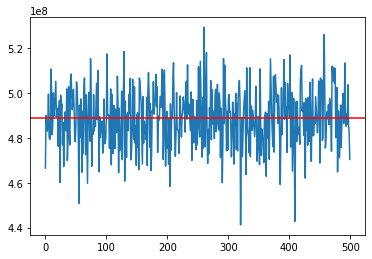

In [38]:
plot_recuit2([i for i in range(1,30)],10^6,1000,0.95,500)

# Influence des paramètres

#Convergence de l'algorithme

In [60]:
#On regarde la convergence de l'algorithme avec le nombre d'itérations pour des solutions initiales arbitraires.
def convergence_iter(s0,t0,n,alpha,m):
    i = 0
    L = []
    while i < m:
        l = []
        cout_min = +inf
        j = 0
        sm = s0
        while j < n :
            j += 1
            s = s0.copy()
            s = echange(s)
            if cout(s) < cout(s0):
                s0 = s
                if cout(s0) < cout_min :
                    sm = s0 ; cout_min = cout(s0)
            else :
                deltaf = cout(s) - cout(s0)
                u = random.random()
                if u <= exp(-deltaf/t0):
                    s0 = s
            t0 = t0*alpha
            l.append(cout_min)
        L.append(l)
        random.shuffle(s0)
        i+=1
    fig, ax = plt.subplots()
    for x in L:
        ax.plot(x)
    plt.show()

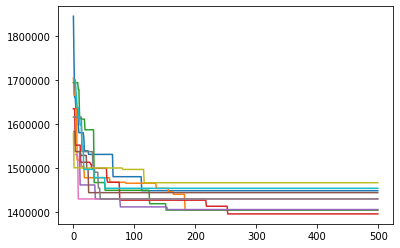

In [61]:
#Exemple avec T0 = 150k, alpha = 0.95
convergence_iter([1,2,3,4,5,6,7,8,9],150000,500,0.95,10)

In [66]:
def convergence_iter(s0,t0,n,alpha,m):
    i = 0
    L = []
    while i < m:
        l = []
        cout_min = +inf
        j = 0
        sm = s0
        while j < n :
            j += 1
            s = s0.copy()
            s = echange(s)
            if cout2(s) < cout2(s0):
                s0 = s
                if cout2(s0) < cout_min :
                    sm = s0 ; cout_min = cout2(s0)
            else :
                deltaf = cout2(s) - cout2(s0)
                u = random.random()
                if u <= exp(-deltaf/t0):
                    s0 = s
            t0 = t0*alpha
            l.append(cout_min)
        L.append(l)
        random.shuffle(s0)
        i+=1
    fig, ax = plt.subplots()
    for x in L:
        ax.plot(x)
    plt.show()

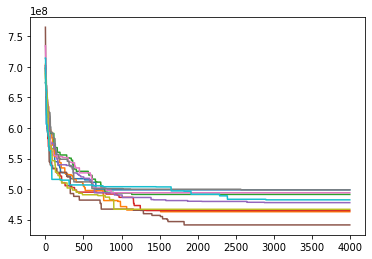

In [69]:
#Convergence pour la grande instance. Prend quelques secondes à s'éxécuter
convergence_iter([i for i in range(1,30)],1000000,4000,0.95,10)

#Influence de la température

In [81]:
def influence_temp(s0,n,alpha):
    L=[]
    T=[]
    t0 = 100
    k = 0
    while k < 1000:
        L.append(recuit(s0,t0,n,alpha)[0])
        T.append(t0)
        t0 += 10000
        k += 1
    fig, ax = plt.subplots()
    ax.plot(T,L)
    plt.show()

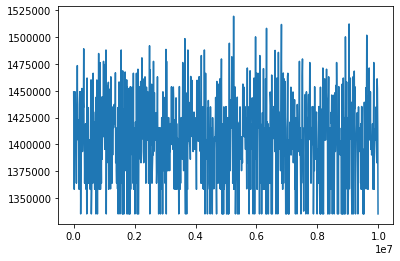

In [87]:
influence_temp([1,2,3,4,5,6,7,8,9],500,0.95)

In [84]:
def influence_temp2(s0,n,alpha):
    L=[]
    T=[]
    t0 = 100
    k = 0
    while k < 1000:
        L.append(recuit2(s0,t0,n,alpha)[0])
        T.append(t0)
        t0 += 10000
        k += 1
    fig, ax = plt.subplots()
    ax.plot(T,L)
    plt.show()

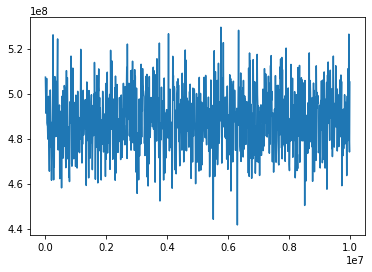

In [86]:
influence_temp2([i for i in range(1,30)],1000,0.95) #Influence de la température pour la deuxième instance

#Influence du facteur de décroissance alpha

In [106]:
#On ne considère que les valeurs de alpha supérieures à 0.5 pour éviter les problèmes de dibision par zéro
def influence_alpha(s0,n,t0):
    L=[]
    T=[]
    alpha = 0.90
    k = 0
    while k < 1000:
        L.append(recuit(s0,t0,n,alpha)[0])
        T.append(alpha)
        alpha += 1/100000
        k += 1
    fig, ax = plt.subplots()
    ax.plot(T,L)
    plt.show()

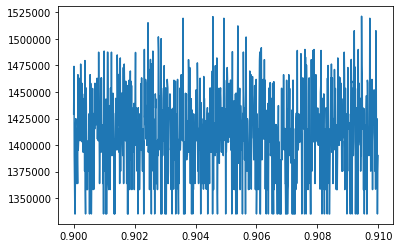

In [107]:
influence_alpha([1,2,3,4,5,6,7,8,9],500,150000)

In [111]:
def influence_alpha2(s0,n,t0):
    L=[]
    T=[]
    alpha = 0.5
    k = 0
    while k < 500:
        L.append(recuit2(s0,t0,n,alpha)[0])
        T.append(alpha)
        alpha += 1/1000
        k += 1
    fig, ax = plt.subplots()
    ax.plot(T,L)
    plt.show()

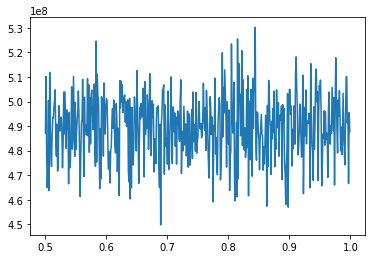

In [112]:
influence_alpha2([i for i in range(1,30)],1000,10^6)